In [95]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import os

%matplotlib inline

## Manually Enter Data

In [5]:
# pd.DataFrame({ 'name':[...,...,...] })
new_df = pd.DataFrame({"column_1": [1,2,3,4,5],
                      "column_2": ['this','column','has','string','inside'],
                      "float_number": [0.1, 0.5, 3.3, 4, 16],
                      "binary_solo": [True, False, False, True, False]})
new_df

,binary_solo,column_1,column_2,float_number
0,True,1,this,0.1
1,False,2,column,0.5
2,False,3,has,3.3
3,True,4,string,4.0
4,False,5,inside,16.0


## Load CSV

In [6]:
cd "/Users/lli2/Git/kaggle/House_Price"

/Users/lli2/Git/kaggle/House_Price


###### Random Read-in Files with Skiprows

Approach 1: select every N-th line

In [11]:
myfile = 'train.csv' # The data to load
n = 10 # take every 10-th row
num_lines = sum(1 for l in open(myfile, encoding='utf-8')) # total rows in file
skip_idx = [x for x in range(0, num_lines) if x % 10 != 0] # have the index to skip

In [14]:
my_df = pd.read_csv(myfile, skiprows = skip_idx, encoding='utf-8')
my_df.shape

(146, 81)

In [12]:
num_lines

1461

Approach 2: random selection

In [18]:
myfile = 'train.csv' # The data to load
num_lines = sum(1 for l in open(myfile))
sample_size = int(num_lines * 0.7)
skip_idx = random.sample(range(0, num_lines), (num_lines-sample_size))

In [20]:
my_df = pd.read_csv(myfile, skiprows = skip_idx)
my_df.shape

(1021, 81)

## Preview and Examine Data

In [23]:
my_df = pd.read_csv(myfile)
my_df.shape

(1460, 81)

In [24]:
my_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
my_df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


###### Select the first columns and their data types

In [32]:
# df.iloc[: , x:y]
my_df.iloc[:,0:10].dtypes

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object

In [38]:
# df[ df.columns[x:y] ]
my_df[my_df.columns[0:10]].dtypes

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object

###### Change column data type

In [45]:
my_df['Id'] = my_df['Id'].astype(str)
my_df.iloc[:, 0:5].dtypes

Id              object
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

###### Data Summary

In [47]:
# only for numeric columns
my_df.iloc[:, 0:10].describe()

,MSSubClass,LotFrontage,LotArea
count,1460.000000,1201.000000,1460.000000
mean,56.897260,70.049958,10516.828082
std,42.300571,24.284752,9981.264932
min,20.000000,21.000000,1300.000000
25%,20.000000,59.000000,7553.500000
50%,50.000000,69.000000,9478.500000
75%,70.000000,80.000000,11601.500000
max,190.000000,313.000000,215245.000000


## Selecting and Manipulating Data

#### Select Columns

Three ways to select columns:
* data_frame.column_name
* data_frame [ [ 'column_name' ] ]
* data_frame.iloc [ : , column_index ]   --> numeric row index

Pandas Series operations:

In [53]:
[my_df['GrLivArea'].sum(),    # sum
my_df['GrLivArea'].mean(),    # average
my_df['GrLivArea'].median(),  # median
my_df['GrLivArea'].nunique(), # number of unique values
my_df['GrLivArea'].min(),     # minimum value
my_df['GrLivArea'].max()]     # maximum value

[2212577, 1515.463698630137, 1464.0, 861, 334, 5642]

#### Select Rows

Three ways to select columns:
* data_frame.iloc[ 0:100, ]  --> numeric row index
* data_frame.loc[100, ] --> label-based, only if you have a set of index in the data frame
* data_frame[ data_frame[ 'column_name' ] == xxx ] --> logic based

#### Delete Rows and Colums --> with drop()

Important parameters:
* **axis**: 1 means "column", 0 means "row"
* **columns**: specify column name, then no need to use "axis"
* **inplace**: True (no need to assign to the same data name) or False (data_frame = ...)

Columns

In [59]:
# Delete "SaleCondition" from the data set
my_df_dropped1 = my_df.drop('SaleCondition', axis=1)
['SaleCondition' in list(my_df.columns), 'SaleCondition' in list(my_df_dropped1.columns)]

[True, False]

In [63]:
# Alternatively, use the parameter "columns" 
my_df_dropped2 = my_df.drop(columns = ['SaleCondition'])
['SaleCondition' in list(my_df.columns), 'SaleCondition' in list(my_df_dropped2.columns)]

TypeError: drop() got an unexpected keyword argument 'columns'

In [64]:
# Drop multiple columns
my_df_dropped3 = my_df.drop(['SaleCondition', 'MoSold'], axis = 1)
['MoSold' in list(my_df_dropped3.columns), 'SaleCondition' in list(my_df_dropped3.columns)]

[False, False]

Rows

In [68]:
# Delete the rows with the lable of 0, 1, 5
my_df_dropped4 = my_df.drop([0,1,5], axis=0)
my_df_dropped4.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [79]:
# Delete the rows with the label of "Reg" in "LotShape"
print(my_df['LotShape'].unique().tolist())

my_df_dropped5 = my_df.set_index('LotShape')
my_df_dropped5 = my_df_dropped5.drop('Reg', axis=0)

# But, this index won't be a column any more
print('LotShape' in my_df_dropped5.columns)

['Reg', 'IR1', 'IR2', 'IR3']
False


## Rename Columns

In [80]:
# Use dictionary mapping {old : new}
my_df_rename1 = my_df.rename(columns = {'MSSubClass':'mssubclass'})
my_df_rename1.columns[0:5]

Index(['Id', 'mssubclass', 'MSZoning', 'LotFrontage', 'LotArea'], dtype='object')

In [82]:
# Still, the parameter of "inplace" will change the dataframe without assignment of a new df
my_df_rename1.rename(columns = {'MSZoning':'mszoing'}, inplace=True)
my_df_rename1.columns[0:5]

Index(['Id', 'mssubclass', 'mszoing', 'LotFrontage', 'LotArea'], dtype='object')

In [84]:
# Rename multiple names
my_df_rename1.rename(columns = {'Id':'id', 'LotFrontage':'lotfrontage'}, inplace=True)
my_df_rename1.columns[0:5]

Index(['id', 'mssubclass', 'mszoing', 'lotfrontage', 'LotArea'], dtype='object')

In [87]:
# Rename all columns with a function
my_df_rename1.rename(columns = str.upper, inplace=True)
my_df_rename1.columns[0:5]

Index(['ID', 'MSSUBCLASS', 'MSZOING', 'LOTFRONTAGE', 'LOTAREA'], dtype='object')

In [90]:
# Rename all columns with a function (version 2)
my_df_rename1.rename(columns = lambda x : x.lower().replace('o','_'), inplace=True)
my_df_rename1.columns[0:5]

Index(['id', 'mssubclass', 'msz_ing', 'l_tfr_ntage', 'l_tarea'], dtype='object')

## Plotting Data Frame

#### Bar Plot

Text(0.5,0,'Sale Price by Bins')

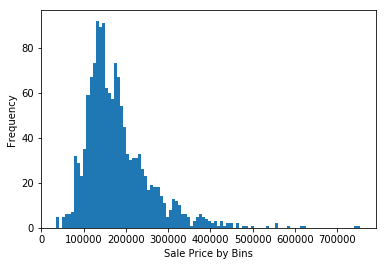

In [96]:
my_df['SalePrice'].plot('hist', bins = 100)
plt.xlabel('Sale Price by Bins')

Text(0,0.5,'Number of House')

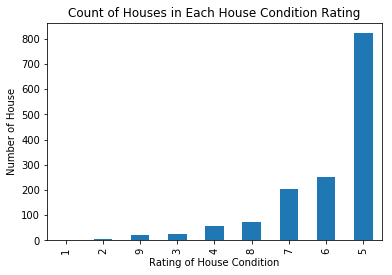

In [108]:
plot_data = my_df.groupby('OverallCond')['Id'].count() # overall condition of the house

plot_data.sort_values().plot(kind='bar')
plt.title('Count of Houses in Each House Condition Rating')
plt.xlabel('Rating of House Condition')
plt.ylabel('Number of House')